# Project 1 – Lede Program 2025(Kensho Kuremoto)
This notebook was used for Project 1 analysis in the Lede Program 2025. The workflow is as follows:

## 1. Data Collection and Preparation  
- Integrated multiple government datasets downloaded from e-Stat (Japan's official statistical portal) and formatted them into a pandas DataFrame.  
  These include:  
  - Annual Crop Condition Index (CCI)  
  - Annual Consumer Price Index (CPI)  
  - Monthly CPI data for the current year  

## 2. Data Visualization in Multiple Formats  
To explore how to visualize data with multiple interacting variables, I created several types of charts:  
- **Three-variable time series**:  
  A combination of CCI and cultivated area (line graphs) and harvest volume (bar graph) over time  
- **Two-variable scatter plots**:  
  Compared CCI with both cultivated area and harvest volume  
- **Merged time series**:  
  Unified the long-term annual CPI with monthly CPI data from this year in a single graph  
- **Basic scatter plot**:  
  Plotted CPI against CCI  
- **Enhanced scatter plot**:  
  Represented harvest volume through bubble size to visualize three variables simultaneously  

## 3. Visual Direction and Refinement  
After several iterations, two types of visualizations were selected as most effective in testing the hypothesis:  
- A combined line-bar chart showing CCI (line) and harvest volume (bar)  
- A bubble chart plotting CPI against CCI, with harvest volume represented by bubble size  

→ The final visualizations were produced in **Datawrapper** and **Flourish**.


In [1]:
pip install pdfplumber pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
df = pd.read_csv("Rice_CPI.csv")
df.head(10)


,Item,Source,1989,1990,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Cultivated Area [ha],Rice,2076000,2055000,2033000,2092000,2127000,2200000,2106000,1967000,...,1505000,1478000,1465000,1470000,1469000,1462000,1403000,1355000,1344000,1359000
1,Yield per 10a [kg],Rice,496,509,470,504,367,544,509,525,...,531,544,534,529,528,531,539,536,533,540
2,Crop Condition Index,Rice,101,103,95,101,74,109,102,105,...,100,103,100,98,99,99,101,100,101,101
3,Harvest Volume [t],Rice,10297000,10463000,9565000,10546000,7811000,11961000,10724000,10328000,...,7986000,8042000,7822000,7780000,7762000,7763000,7563000,7269000,7165000,7345000
4,Overall,CPI,87,90,93,94,95,96,96,96,...,98,98,99,100,100,100,100,102,106,108
5,Food,CPI,79,82,86,86,87,88,87,87,...,95,96,97,98,99,100,100,104,113,118
6,Grains,CPI,95,97,99,102,104,110,102,101,...,94,96,97,99,100,100,99,104,112,121
7,Rice,CPI,115,116,116,121,124,136,119,116,...,88,91,95,100,100,100,97,93,96,123
8,Non-glutinous rice A,CPI,116,118,118,123,126,148,122,120,...,90,93,96,99,100,100,97,93,96,121
9,Non-glutinous rice B,CPI,117,118,118,123,126,136,121,118,...,85,89,94,100,100,100,97,92,96,124


In [7]:
df.shape

(15, 38)

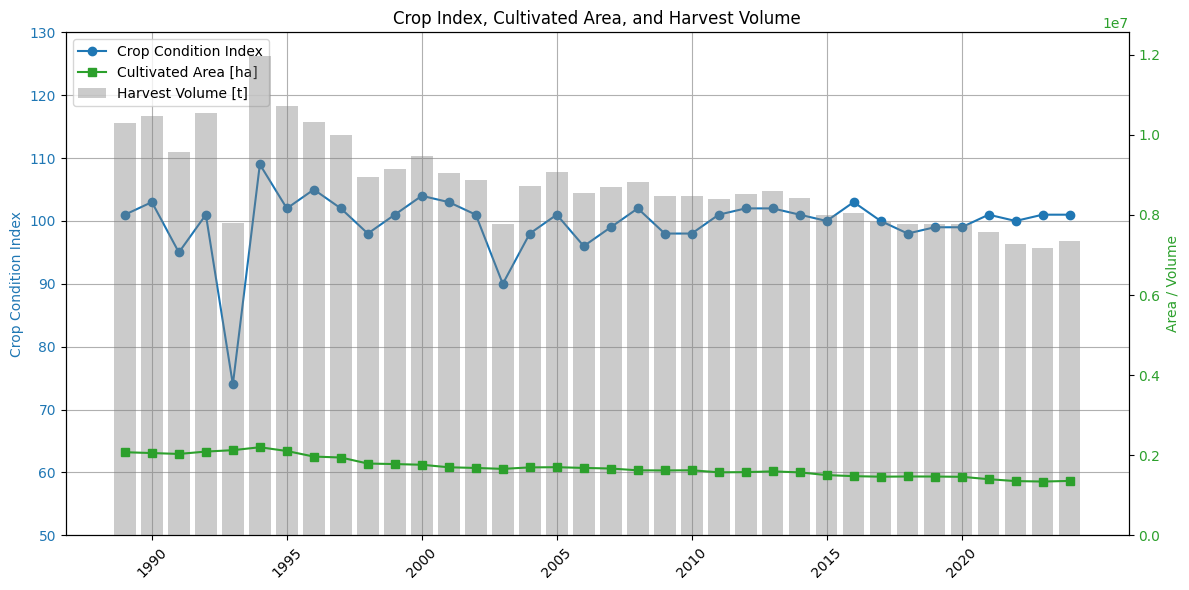

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Rice_CPI.csv", index_col=0)
year_columns = [col for col in df.columns if col.isnumeric()]
years = [str(y) for y in year_columns]

crop = df.loc["Crop Condition Index", year_columns].astype(float)
area = df.loc["Cultivated Area [ha]", year_columns].astype(float)
harvest = df.loc["Harvest Volume [t]", year_columns].astype(float)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(years, crop, color="tab:blue", marker="o", label="Crop Condition Index")
ax1.set_ylabel("Crop Condition Index", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.set_ylim(50, 130)

ax2 = ax1.twinx()
ax2.plot(years, area, color="tab:green", marker="s", label="Cultivated Area [ha]")
ax2.bar(years, harvest, color="tab:gray", alpha=0.4, label="Harvest Volume [t]")
ax2.set_ylabel("Area / Volume", color="tab:green")
ax2.tick_params(axis="y", labelcolor="tab:green")

tick_labels = [y for y in years if int(y) % 5 == 0]
ax1.set_xticks(tick_labels)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.title("Crop Index, Cultivated Area, and Harvest Volume")
fig.tight_layout()
ax1.grid(True)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.show()


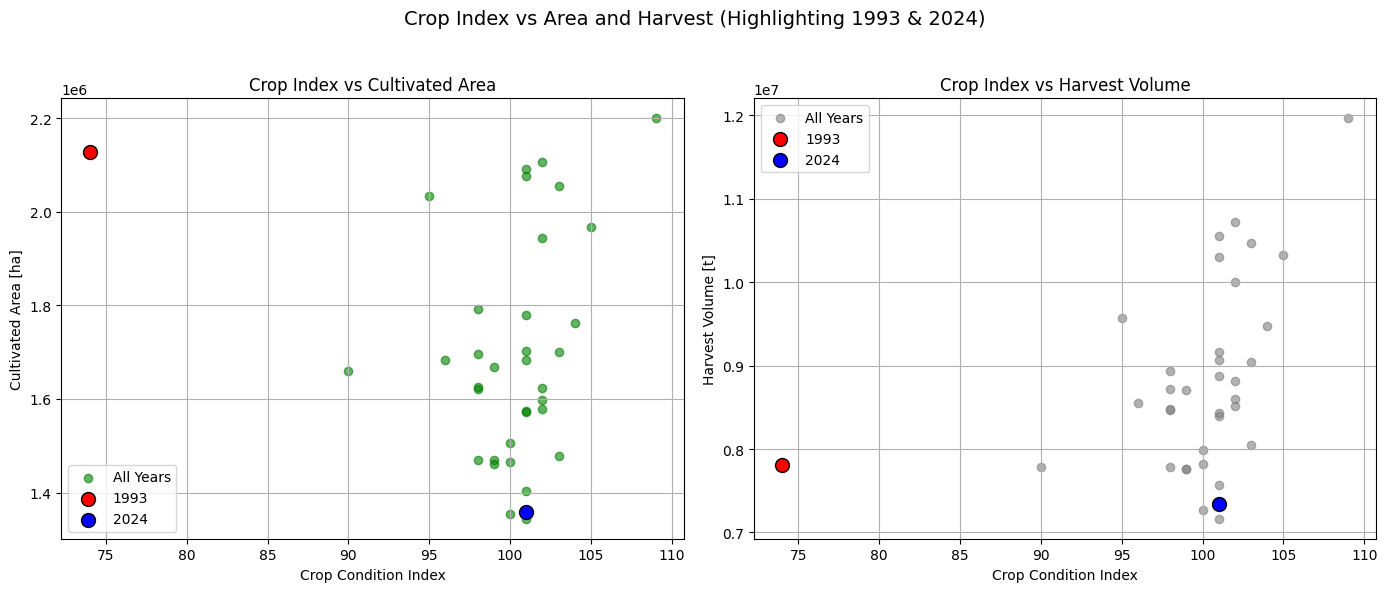

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Rice_CPI.csv", index_col=0)

year_columns = [col for col in df.columns if col.isnumeric()]
years = [str(y) for y in year_columns]

crop = df.loc["Crop Condition Index", years].astype(float)
area = df.loc["Cultivated Area [ha]", years].astype(float)
harvest = df.loc["Harvest Volume [t]", years].astype(float)

idx_1993 = years.index("1993")
idx_2024 = years.index("2024")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(crop, area, color="green", alpha=0.6, label="All Years")
ax1.scatter(crop.iloc[idx_1993], area.iloc[idx_1993], color="red", s=100, label="1993", edgecolor="black")
ax1.scatter(crop.iloc[idx_2024], area.iloc[idx_2024], color="blue", s=100, label="2024", edgecolor="black")
ax1.set_xlabel("Crop Condition Index")
ax1.set_ylabel("Cultivated Area [ha]")
ax1.set_title("Crop Index vs Cultivated Area")
ax1.grid(True)
ax1.legend()

ax2.scatter(crop, harvest, color="gray", alpha=0.6, label="All Years")
ax2.scatter(crop.iloc[idx_1993], harvest.iloc[idx_1993], color="red", s=100, label="1993", edgecolor="black")
ax2.scatter(crop.iloc[idx_2024], harvest.iloc[idx_2024], color="blue", s=100, label="2024", edgecolor="black")
ax2.set_xlabel("Crop Condition Index")
ax2.set_ylabel("Harvest Volume [t]")
ax2.set_title("Crop Index vs Harvest Volume")
ax2.grid(True)
ax2.legend()

plt.suptitle("Crop Index vs Area and Harvest (Highlighting 1993 & 2024)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


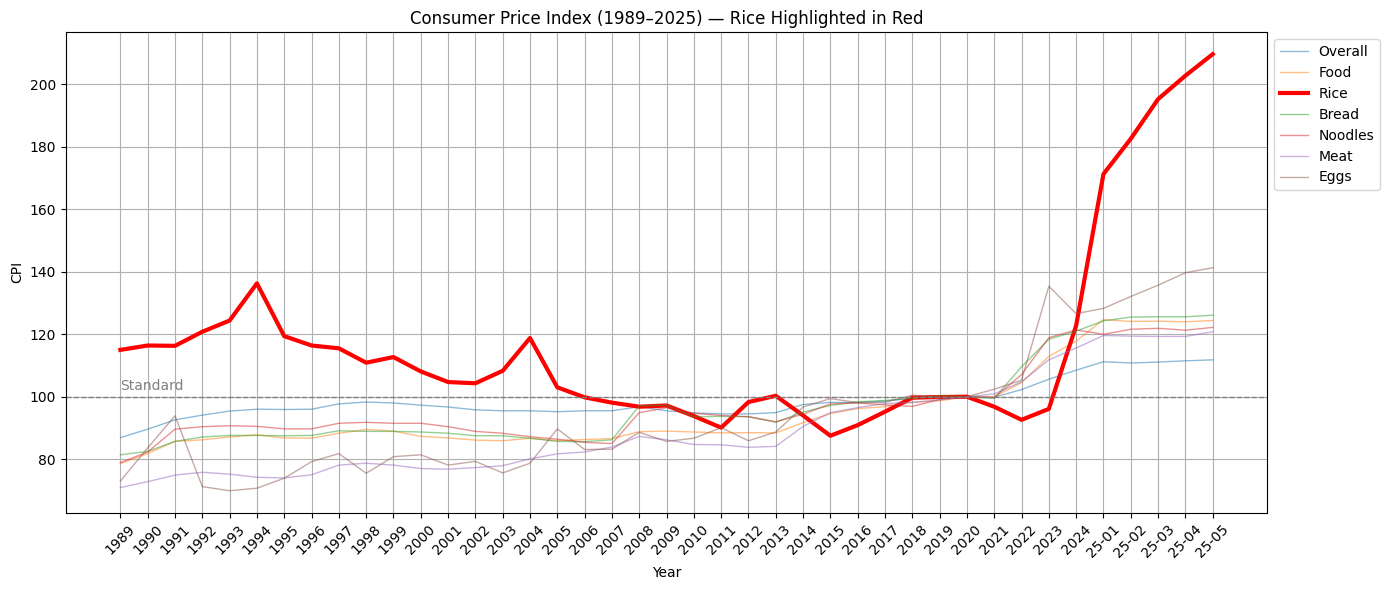

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Consumer_Price _Index_table.xlsx"
df = pd.read_excel(file_path, index_col=0)

exclude_items = ["Grains", "Non-glutinous rice A", "Non-glutinous rice B", "Seafood"]
df = df.drop(index=exclude_items, errors="ignore")

df.columns = df.columns.astype(str)
df = df[sorted(df.columns)]

plt.figure(figsize=(14, 6))
for item in df.index:
    if item == "Rice":
        plt.plot(
            df.columns,
            df.loc[item],
            label=item,
            linewidth=3,
            color='red'
        )
    else:
        plt.plot(
            df.columns,
            df.loc[item],
            label=item,
            linewidth=1,
            alpha=0.5
        )

plt.axhline(y=100, color='gray', linestyle='--', linewidth=1)
plt.text(x=0, y=102, s='Standard', color='gray', fontsize=10)

plt.xlabel("Year")
plt.ylabel("CPI")
plt.title("Consumer Price Index (1989–2025) — Rice Highlighted in Red")
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()


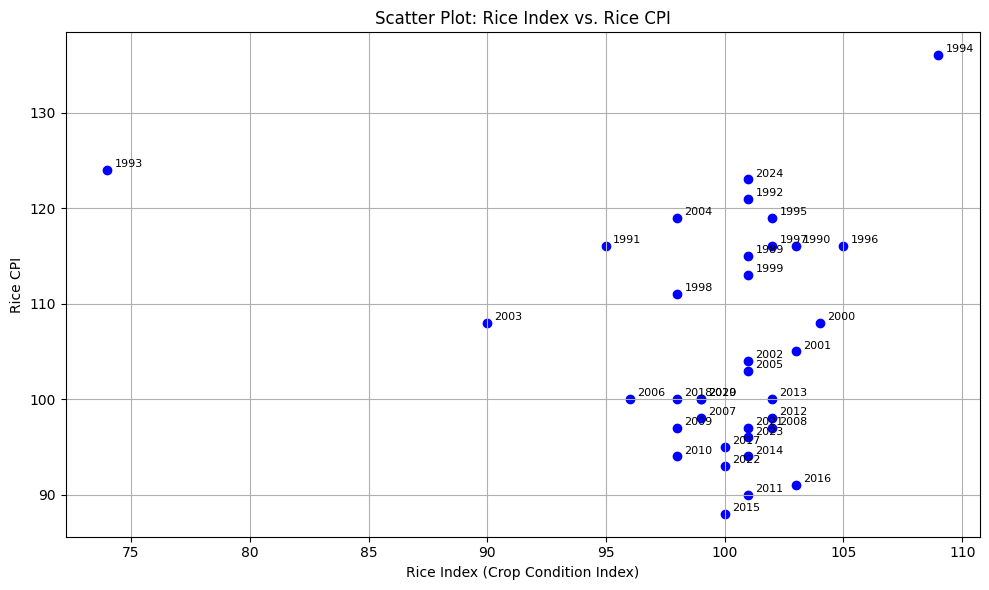

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Rice_CPI.csv", index_col=0)

year_columns = [col for col in df.columns if col.isdigit()]
years = [int(y) for y in year_columns]

rice_index = df.loc["Crop Condition Index", year_columns].astype(float)
rice_cpi = df.loc["Rice", year_columns].astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(rice_index, rice_cpi, color='blue')

for i, year in enumerate(years):
    plt.text(rice_index.iloc[i] + 0.3, rice_cpi.iloc[i] + 0.3, str(year), fontsize=8)

plt.xlabel("Rice Index (Crop Condition Index)")
plt.ylabel("Rice CPI")
plt.title("Scatter Plot: Rice Index vs. Rice CPI")

plt.grid(True)
plt.tight_layout()
plt.show()


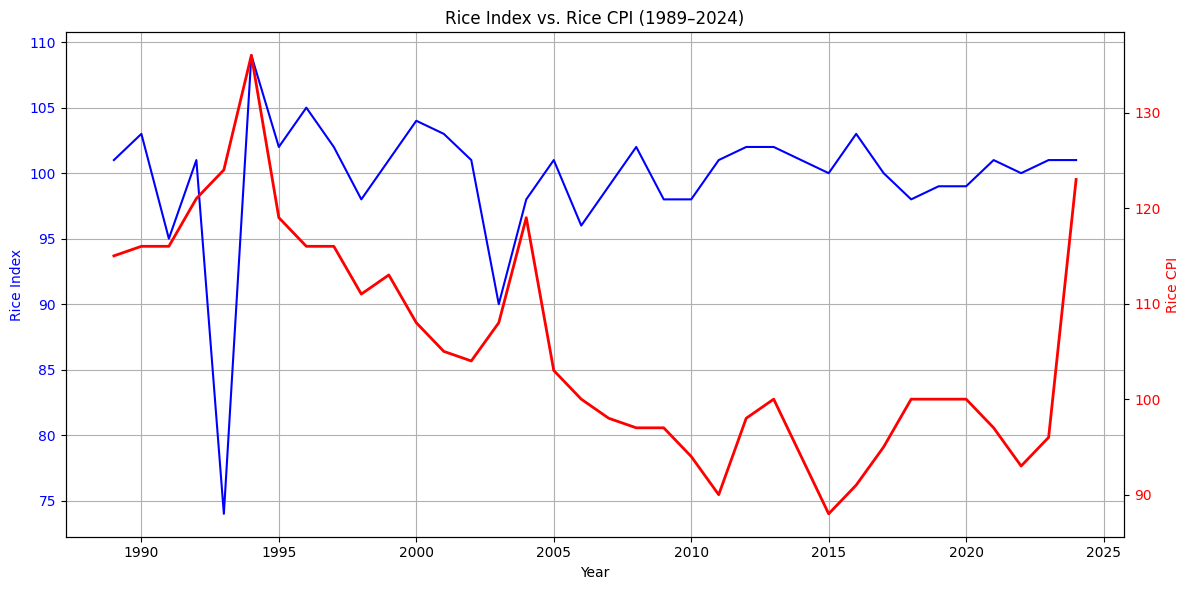

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Rice_CPI.csv", index_col=0)

year_columns = [col for col in df.columns if col.isdigit()]
years = [int(y) for y in year_columns]

rice_index = df.loc["Crop Condition Index", year_columns].astype(float)
rice_cpi = df.loc["Rice", year_columns].astype(float)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(years, rice_index, color='blue', label='Rice Index')
ax1.set_ylabel('Rice Index', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(years, rice_cpi, color='red', label='Rice CPI', linewidth=2)
ax2.set_ylabel('Rice CPI', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Rice Index vs. Rice CPI (1989–2024)')
ax1.set_xlabel('Year')

ax1.grid(True)
fig.tight_layout()
plt.show()


In [9]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


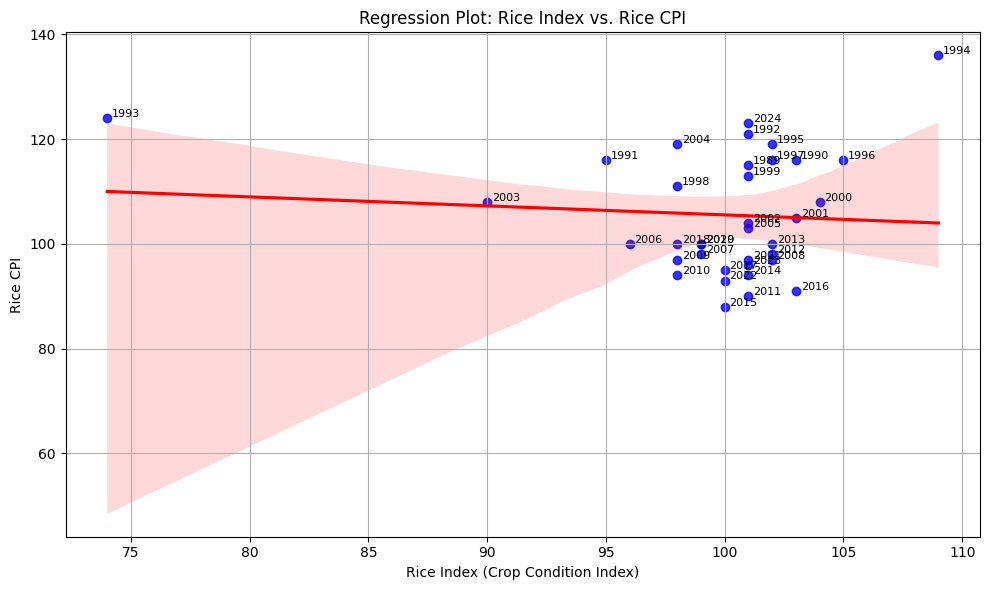

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Rice_CPI.csv", index_col=0)

year_columns = [col for col in df.columns if col.isdigit()]
years = [int(y) for y in year_columns]

rice_index = df.loc["Crop Condition Index", year_columns].astype(float)
rice_cpi = df.loc["Rice", year_columns].astype(float)

plot_df = pd.DataFrame({
    "Rice Index": rice_index.values,
    "Rice CPI": rice_cpi.values,
    "Year": years
})

plt.figure(figsize=(10, 6))
sns.regplot(data=plot_df, x="Rice Index", y="Rice CPI", scatter_kws={"color": "blue"}, line_kws={"color": "red"})

for i in range(len(plot_df)):
    plt.text(plot_df["Rice Index"][i] + 0.2, plot_df["Rice CPI"][i] + 0.2, str(plot_df["Year"][i]), fontsize=8)

plt.xlabel("Rice Index (Crop Condition Index)")
plt.ylabel("Rice CPI")
plt.title("Regression Plot: Rice Index vs. Rice CPI")
plt.grid(True)
plt.tight_layout()
plt.show()


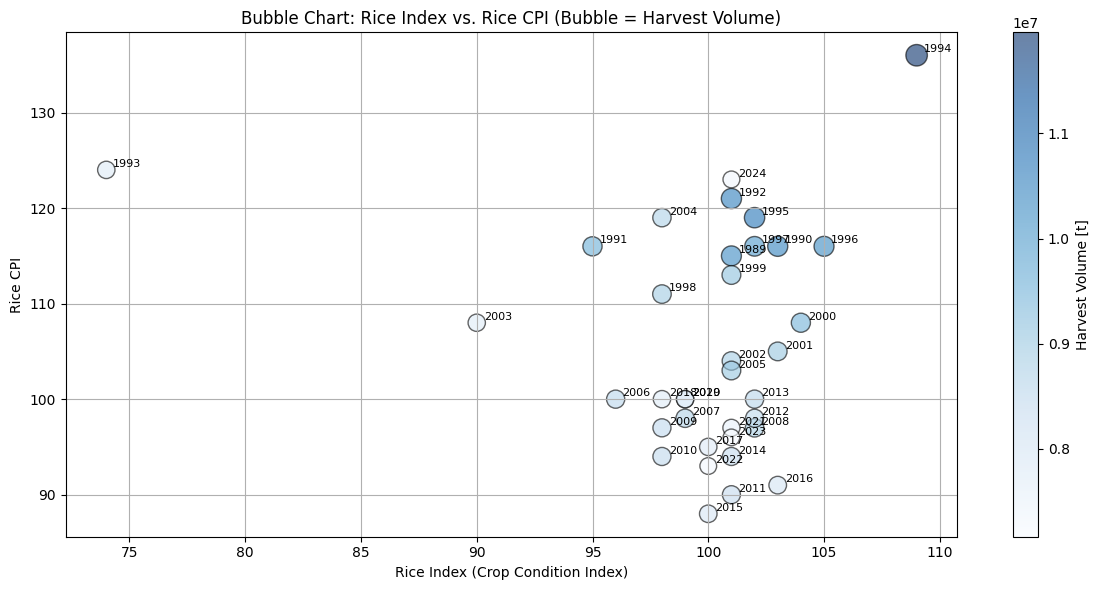

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Rice_CPI.csv", index_col=0)

year_columns = [col for col in df.columns if col.isdigit()]
years = [int(y) for y in year_columns]

rice_index = df.loc["Crop Condition Index", year_columns].astype(float)
rice_cpi = df.loc["Rice", year_columns].astype(float)
harvest_volume = df.loc["Harvest Volume [t]", year_columns].astype(float)

bubble_size = harvest_volume / 50000  # 適宜調整

plt.figure(figsize=(12, 6))
scatter = plt.scatter(rice_index, rice_cpi, s=bubble_size, c=harvest_volume, cmap='Blues', alpha=0.6, edgecolors="k")

for i, year in enumerate(years):
    plt.text(rice_index.iloc[i] + 0.3, rice_cpi.iloc[i] + 0.3, str(year), fontsize=8)

plt.xlabel("Rice Index (Crop Condition Index)")
plt.ylabel("Rice CPI")
plt.title("Bubble Chart: Rice Index vs. Rice CPI (Bubble = Harvest Volume)")

cbar = plt.colorbar(scatter)
cbar.set_label("Harvest Volume [t]")

plt.grid(True)
plt.tight_layout()
plt.show()


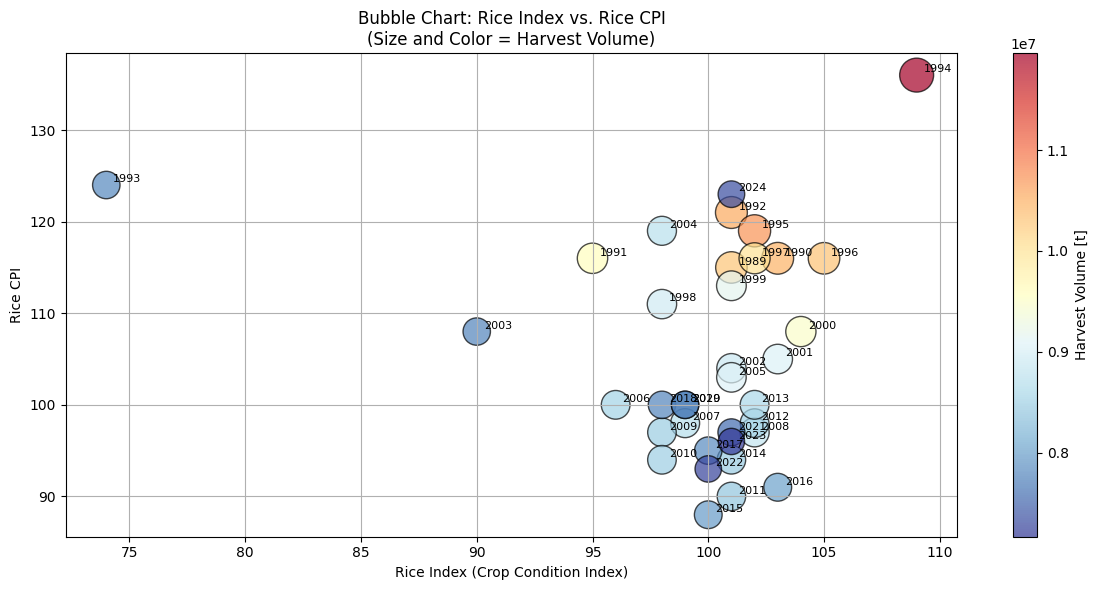

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Rice_CPI.csv", index_col=0)

year_columns = [col for col in df.columns if col.isdigit()]
years = [int(y) for y in year_columns]

rice_index = df.loc["Crop Condition Index", year_columns].astype(float)
rice_cpi = df.loc["Rice", year_columns].astype(float)
harvest_volume = df.loc["Harvest Volume [t]", year_columns].astype(float)

bubble_size = harvest_volume / 20000

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    rice_index, rice_cpi,
    s=bubble_size,
    c=harvest_volume,
    cmap='RdYlBu_r', 
    alpha=0.7,
    edgecolors="k"
)

for i, year in enumerate(years):
    plt.text(rice_index.iloc[i] + 0.3, rice_cpi.iloc[i] + 0.3, str(year), fontsize=8)

plt.xlabel("Rice Index (Crop Condition Index)")
plt.ylabel("Rice CPI")
plt.title("Bubble Chart: Rice Index vs. Rice CPI\n(Size and Color = Harvest Volume)")

cbar = plt.colorbar(scatter)
cbar.set_label("Harvest Volume [t]")

plt.grid(True)
plt.tight_layout()
plt.show()
